# 随时间变化的对象-时间序列分析Timeseries analysis

可不可以用一个商场的前某一时段的数据来预测其下个月的销售额呢？可不可以用过去的数据去预测未来？这些研究问题的对象都是和时间有关的，也就是时间序列模型。前面几章我们主要研究的是横截面数据，也就是研究对大体上同时发生的或者和时间关系不大的不同对象的观测值组成的数据。而**时间序列**数据就是由对象在不同的时间的观测值形成的固定，带有一定长度的数据。

经典的回归模型是建立因变量与自变量之间的关系模型，并且可以用自变量去预测因变量。而时间序列模型的观测值并不是独立的，因变量为变量未来的可能值，而用来预测的自变量中就包含该变量的一系列历史观测值。

In [3]:
import math
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pandas.plotting import register_matplotlib_converters,register_matplotlib_converters

import statsmodels as tsm
import matplotlib as tplt

税率案例分析

<AxesSubplot:>

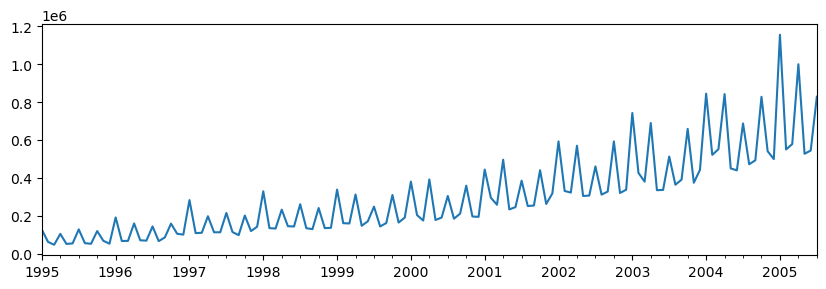

In [7]:
tax = pd.read_csv("../data/tax.TXT",sep='\s+',header=None)
tax.index = pd.date_range('1-1995',periods=len(tax),freq='M')
tax.plot(figsize=(10,3),legend=False)

<AxesSubplot:title={'center':'Trend and Error'}, xlabel='Time'>

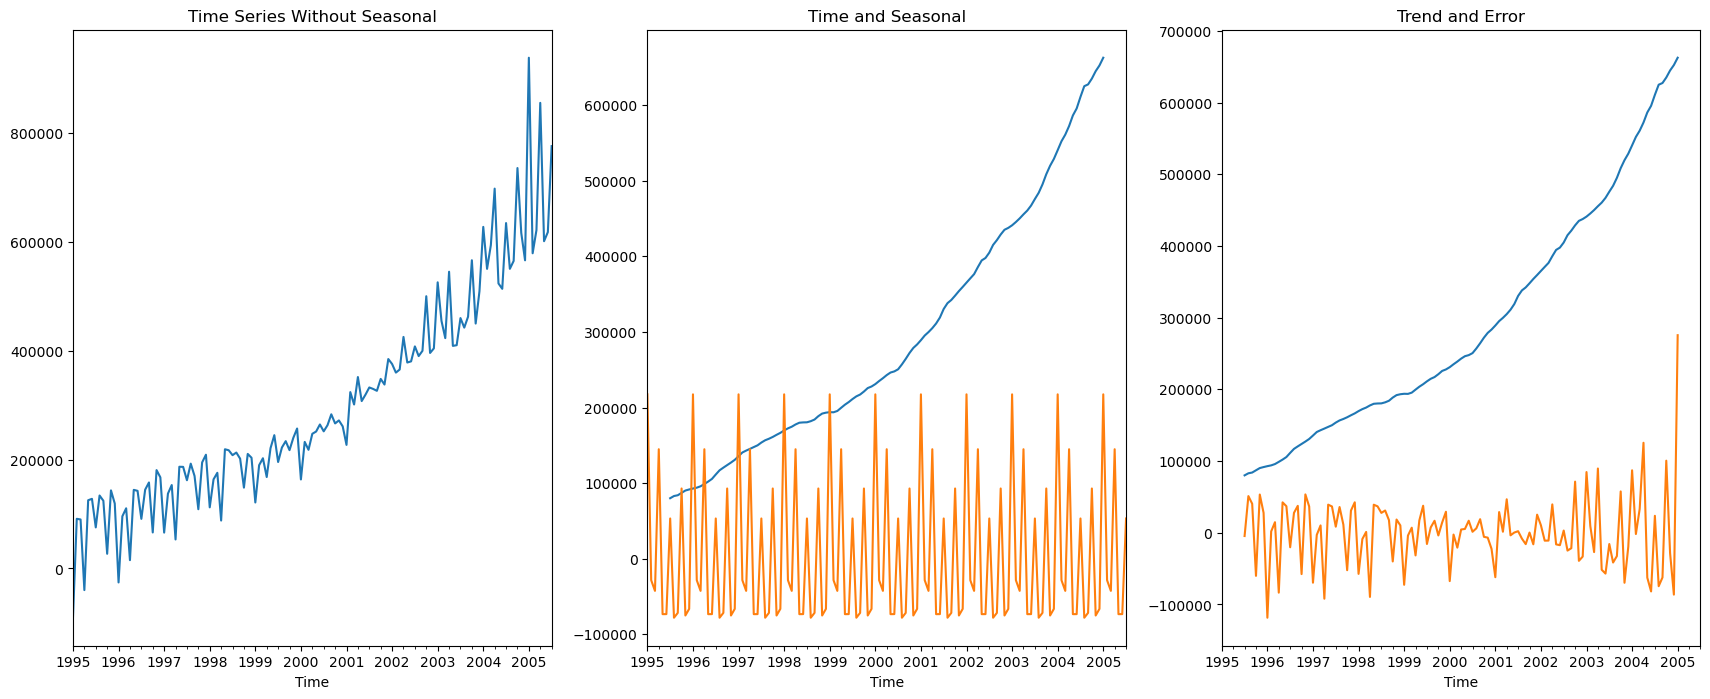

In [14]:
st1 = seasonal_decompose(tax,)
fig = plt.figure(figsize=(21,8))
ax1 = fig.add_subplot(1,3,1)
ax1.set_title('Time Series Without Seasonal')
ax1.set_xlabel('Time')
(st1.observed - st1.seasonal).plot(ax=ax1)

ax2 = fig.add_subplot(1,3,2)
ax2.set_title('Time and Seasonal')
ax2.set_xlabel('Time')
st1.trend.plot(ax=ax2)
st1.seasonal.plot(ax=ax2)

ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title('Trend and Error')
ax3.set_xlabel('Time')
st1.trend.plot(ax=ax3)
st1.resid.plot(ax=ax3)


d:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


<AxesSubplot:>

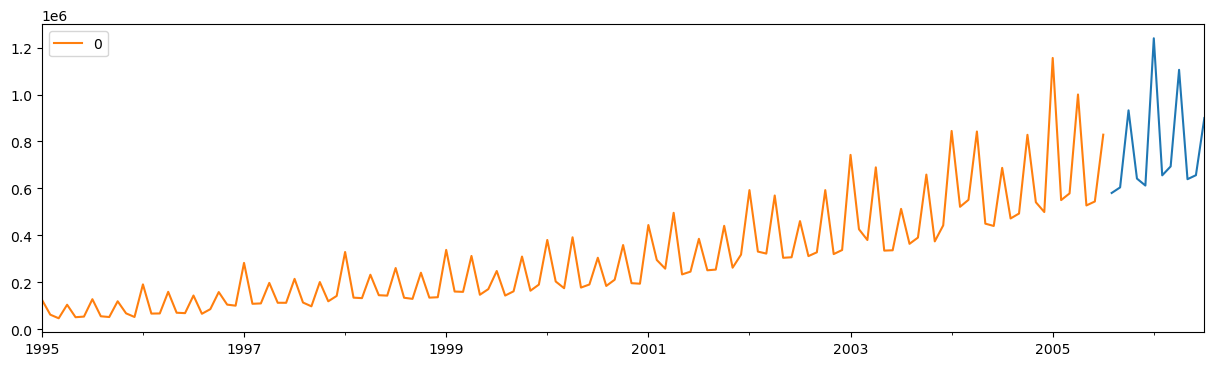

In [20]:
holt = ExponentialSmoothing(tax,trend='add',seasonal='add',seasonal_periods=12)
holt_fit = holt.fit()

preds = holt_fit.predict(start=len(tax),end=len(tax)+11)
preds = pd.Series(preds,index=pd.date_range('8-2005',periods=len(preds),freq='M'))

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
preds.plot(ax=ax)
tax.plot(ax=ax)


仅仅实在孤立的系统中，不考虑其他影响变量，时间序列分析才变得非常有意义，它仅仅是现实世界的一种近似。比较简单的时间序列分为三部分：**趋势trend、季节seasonal、随机干扰disturbance**。

## ARIMA model

ARIMA（自回归移动平均）模型一种常用的方法。ARIMA模被用于对具趋势和季性特征的时间序列数据进行建模和预测。

ARIMA模型由三个部组成：自回归（AR）、差分（I）和移动平均（MA）。下面是每个部分的解释和相应的公式：

自回归（AR）部分：
自回归是指当前观测值与过去观测值之间存在相关性。AR(p)模型使用过去p个时间步的观测值来预测当前观测值。
AR(p)模型的公式为：
$$X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} +\ldots + _p X_{t-p} + \varepsilon_t$$
其中，$X_t$ 是当前时间步的观测值，$c$ 是常数，$\phi_1, \phi_2, \ldots, \phi_p$是回归系数$\varepsilon_t$是误差。

差分（I）部分：
差分是指时间序列进行一阶或多阶的分操作，以消除非平稳性。通过差分操作，可以将非平稳时间列转化为稳时间序列，使其更容易建模和预测。

移动平均（MA）部分：
移动平均是指当前观测值与去误差项之间存在相关性。MA(q)模型使用过去q个时间步的误差项来预测当前观测值。
MA(q)模型的公式为：
$$(1-\phi_1B-\ldots-\phi_pB^p)(1-B)^dX_t = (1+\theta_1B+\ldots+\theta_qB^q)Z_t$$
其，$X_t$ 是当前时间步的测值，$c$ 是常数，$\varepsilon_t$ 是当前时间步的差项，$\theta_1, \theta_2, \ldots, \theta_q$ 是移动平均系数。

ARIMA模型结合了这三个部分，用于对时间序列数据进行模和预测。ARIMA模型的一形式为ARIMA(p, d, q)，其中p是自回归阶数，d是差分阶数，q移动平均阶数。

d:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


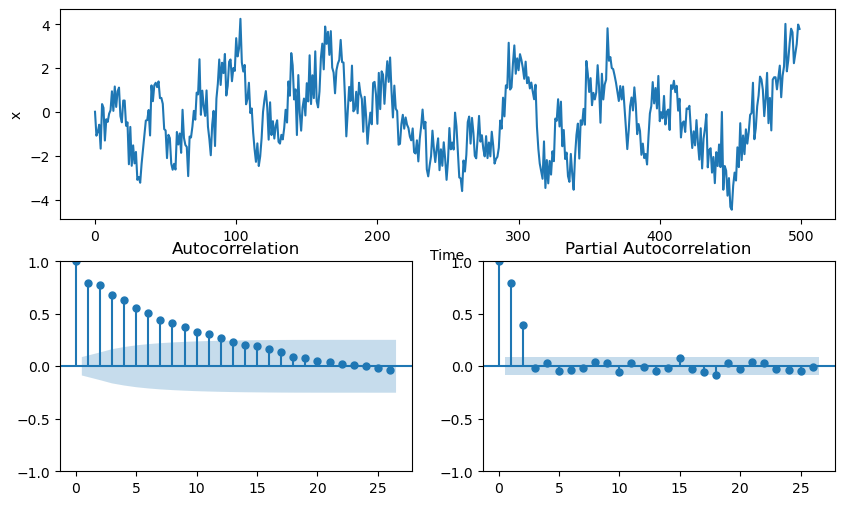

In [25]:
ar2 = pd.read_csv('../data/ar2.txt',header=None)
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,1,1)
ax1.set_xlabel('Time')
ax1.set_ylabel('x')
ax1.plot(ar2)

ax2 = fig.add_subplot(2,2,3)
_ = sm.graphics.tsa.plot_acf(ar2,lags=26,ax=ax2)

ax3 = fig.add_subplot(2,2,4)
_ = sm.graphics.tsa.plot_pacf(ar2,lags=26,ax=ax3)

d:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


Text(0.5, 1.0, 'Acf of ARMA Series')

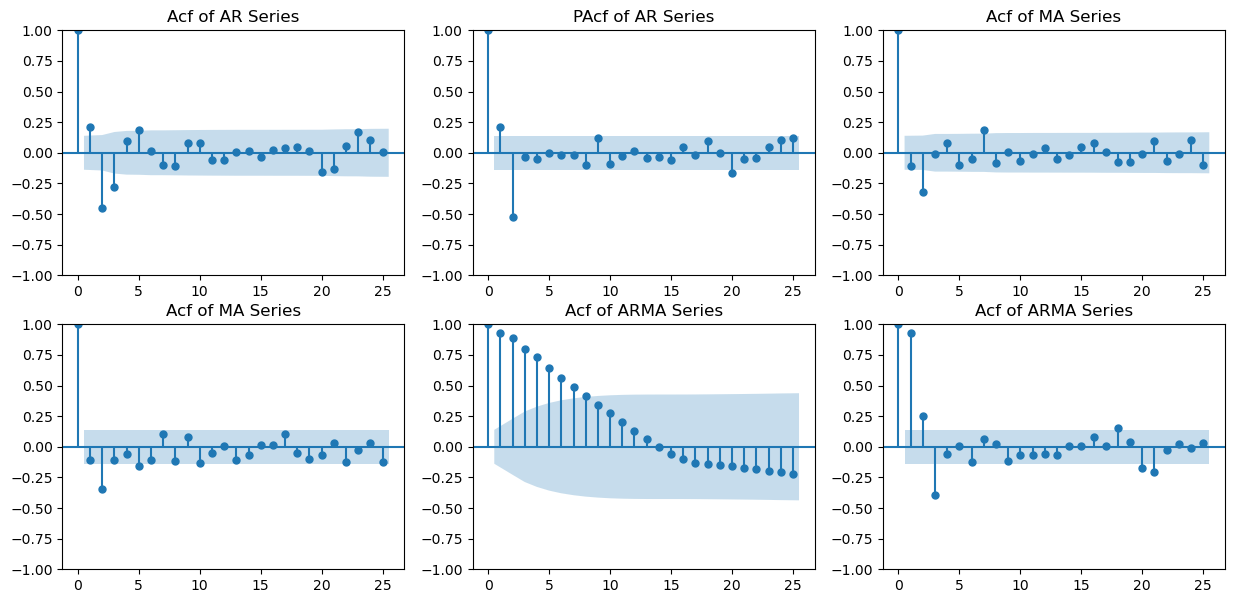

In [35]:
ar_process = sm.tsa.ArmaProcess(ar=np.array([1,-0.3,0.6]))
ma_process = sm.tsa.ArmaProcess(ma=np.array([1,-0.3,-0.4]))
arma_process = sm.tsa.ArmaProcess(ar = np.array([1,-0.3,-0.6]),ma=np.array([1,0.5,0.2]))

x1 = ar_process.generate_sample(200)
x2 = ma_process.generate_sample(200)
x3 = arma_process.generate_sample(200)
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(231)
_ = sm.graphics.tsa.plot_acf(x1, lags=25, ax=ax1)
ax1.set_title('Acf of AR Series')

ax2 = fig.add_subplot(232)
_ = sm.graphics.tsa.plot_pacf(x1, lags=25, ax=ax2)
ax2.set_title('PAcf of AR Series')

ax3 = fig.add_subplot(233)
_ = sm.graphics.tsa.plot_acf(x2, lags=25, ax=ax3)
ax3.set_title('Acf of MA Series')

ax4 = fig.add_subplot(234)
_ = sm.graphics.tsa.plot_pacf(x2, lags=25, ax=ax4)
ax4.set_title('Acf of MA Series')

ax5 = fig.add_subplot(235)
_ = sm.graphics.tsa.plot_acf(x3, lags=25, ax=ax5)
ax5.set_title('Acf of ARMA Series')

ax6 = fig.add_subplot(236)
_ = sm.graphics.tsa.plot_pacf(x3, lags=25, ax=ax6)
ax6.set_title('Acf of ARMA Series')


In [ ]:
ar2_model = sm.tsa.statespace.SARIMAX(ar2.astype(int), order=(2, 0, 0), trend='n').fit(disp=False)
print(ar2_model.params)
fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(1,3,1)
_ = sm.graphics.tsa.plot_acf(ar2_model, lags=25, ax=ax1)

ax2 = fig.add_subplot(1,3,2)
_ = sm.graphics.tsa.plot_pacf(ar2_model, lags=26, ax=ax2)

ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(ar2_model.resid)


在Python中，ARIMA模型是一种常用的时间序列分析方法，用于预测未来的数据点。ARIMA模型的参数包p、d和q，它们分别代表自回归阶数（Autoregressive Order）、差分阶数（Differencing Order）和移动平均阶数（Moving Average Order）。

p（自回归阶数）：表示模型中使用的自回归项的数量。自回归是指当前观察值与过去观察值之间的关系。p的取值通常通过自相关函数（ACF）图或部分自相关函数（PACF）图来确定。ACF图显示了不同滞后阶数的自相关系数，而PACF图显示了每个滞后阶数的偏自相关系数。根据这些图形，可以选择合适的p值。

d（差分阶数）：表示进行差分操作的次数，以使时间序变得平稳。平稳时间序列的意思是其均和方差在时间上保持恒定。如果时间序列不平稳，可以通过对观察值进行差分来减少或消除趋势和季节性。通常，需要进行多次差分才能达到平稳。d的取值可以通过观察时间序列的趋势来确定。

q（移动平均阶数）：表示模型中使用的移动平均项的数量。移动平均是指当前观察值与过去观察值之间的误差的加权平均。与自回归不同，移动平均考虑了过去观察值的误差。q取值通常也可以通过ACF图PACF图来确定。

这些参数共同决定了ARIMA模型的复杂度和性能。选择合适的参数值是一个迭代的过程，可以使用各种方法，如观察时间序列的图形、自相关函数和部分自相关函数，以及使用信息准则（如AIC、BIC）进行模型选择。